<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/01_Clustering_for_dataset_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Clustering for dataset exploration</h1> 
</strong>

---


Learn how to discover the underlying groups (or "clusters") in a dataset. By the end of this Notebook, we'll be clustering companies using their stock market prices, and distinguishing different species by clustering their measurements.

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 2310 (delta 17), reused 100 (delta 6), pack-reused 2186
Receiving objects: 100% (2310/2310), 276.16 MiB | 33.53 MiB/s, done.
Resolving deltas: 100% (795/795), done.
Checking out files: 100% (1004/1004), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
#sns.set_theme(style='whitegrid')
%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/27_Unsupervised Learning in Python/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/27_Unsupervised Learning in Python/_dataset


In [4]:
ls

 company-stock-movements-2010-2015-incl.csv  'Musical artists'/
 eurovision-2016.csv                          new_points.csv
 fish.csv                                     points.csv
 Grains/                                     'Wikipedia articles'/
 lcd-digits.csv                               wine.csv


## Unsupervised Learning

- **Unsupervised Learning**
    - Finds patterns in data (E.g., clustering customers by their purchase)
    - Compressing the data using purchase patterns (dimension reduction)

- **Supervised vs unsupervised learning**
    - Supervised learning finds patterns for a prediction task 
    
    e.g., classify tumors as benign or cancerous (labels)
    - Unsupervised learning finds patterns in data, but without a specific prediction task in mind

- **K-means clustering**
    - Finds clusters of samples
    - Number of clusters must be specified
    
- **Cluster labels for new samples**
    - New samples can be assigned to existing clusters
    - k-means remembers the mean of each cluster (the "centroids")
    - Finds the nearest centroid to each new sample

### How many clusters?

In [5]:
points = pd.read_csv('points.csv').reset_index(drop=True)
points.drop(['Unnamed: 0'], axis=1, inplace=True)
points.columns

Index(['0', '1'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


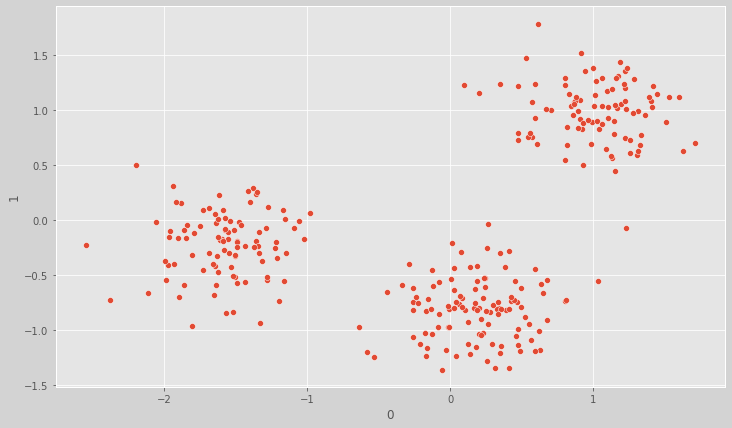

In [6]:
xs = points['0']
ys = points['1']

plt.figure(figsize=(12,7), facecolor='lightgrey')
sns.scatterplot(xs, ys)

### Clustering 2D points
From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the ```.predict()``` method.

In [7]:
new_points = pd.read_csv('new_points.csv').reset_index(drop=True)
new_points.drop(['Unnamed: 0'], axis=1, inplace=True)
new_points.columns

Index(['0', '1'], dtype='object')

__KMeans Clustring__

In [8]:
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)   

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[1 2 0 1 2 1 2 2 2 0 1 2 2 0 0 2 0 0 2 2 0 2 1 2 1 0 2 0 0 1 1 2 2 2 0 1 2
 2 1 2 0 1 1 0 1 2 0 0 2 2 2 2 0 0 1 1 0 0 0 1 1 2 2 2 1 2 0 2 1 0 1 1 1 2
 1 0 0 1 2 0 1 0 1 2 0 2 0 1 2 2 2 1 2 2 1 0 0 0 0 1 2 1 0 0 1 1 2 1 0 0 1
 0 0 0 2 2 2 2 0 0 2 1 2 0 2 1 0 2 0 0 2 0 2 0 1 2 1 1 2 0 1 2 1 1 0 2 2 1
 0 1 0 2 1 0 0 1 0 2 2 0 2 0 0 2 2 1 2 2 0 1 0 1 1 2 1 2 2 1 1 0 1 1 1 0 2
 2 1 0 1 0 0 2 2 2 1 2 2 2 0 0 1 2 1 1 1 0 2 2 2 2 2 2 0 0 2 0 0 0 0 2 0 0
 2 2 1 0 1 1 0 1 0 1 0 2 2 0 2 2 2 0 1 1 0 2 2 0 2 0 0 2 0 0 1 0 1 1 1 2 0
 0 0 1 2 1 0 1 0 0 2 1 1 1 0 2 2 2 1 2 0 0 2 1 1 0 1 1 0 1 2 1 0 0 0 0 2 0
 0 2 2 1]


### ***Inspect your clustering***
Let's now inspect the clustering you performed in the previous exercise!



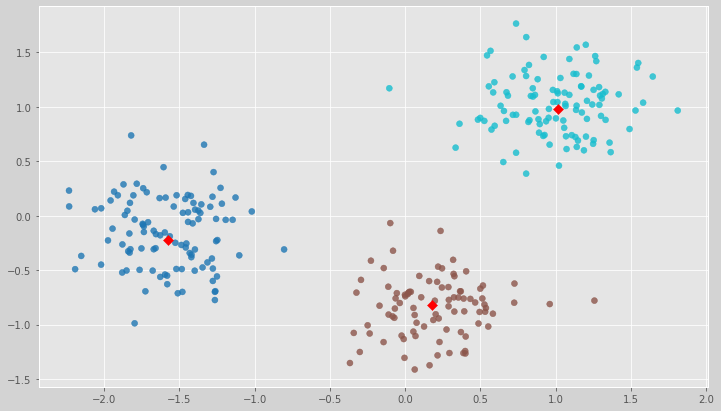

In [9]:
# Assign the columns of new_points: xs and ys
xs = new_points['0']
ys = new_points['1']

# plot size
plt.figure(figsize=(12,7), facecolor='lightgrey')

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, cmap='tab10', c=labels, alpha=0.8) #label according to the 

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='red')
plt.show()

```python
plt.savefig('/content/kmeans-centroid.png')
```

## Evaluating a clustering
- Evaluating a clustering
    - Can check correspondence with e.g. iris species, but what if there are no species to check against?
    - Measure quality of a clustering
    - Informs choice of how many clusters to look for
- Cross-tabulation with pandas
    - Clusters vs species is a "cross-tabulation"
- Measuring clustering quality
    - Using only samples and their cluster labels
    - A good clustering has tight clusters
    - Samples in each cluster bunched together
- Inertia measures clustering quality
    - Measures how spread out the clusters are (lower is better)
    - Distance from each sample to centroid of its cluster
    - k-means attempts to minimize the inertia when choosing clusters
- How many clusters to choose?
    - Choose an "elbow" in the inertia plot
    - Where inertia begins to decrease more slowly

### How many clusters of grain?
In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array ```samples``` containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

#### Preprocess

In [10]:
df = pd.read_csv('Grains/seeds.csv', header=None)
df[7] = df[7].map({1:'Kama wheat', 2:'Rosa wheat', 3:'Canadian wheat'})
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [11]:
samples = df.iloc[:, :-1].values
varieties = df.iloc[:, -1].values

([<matplotlib.axis.XTick at 0x7f652dcf9bd0>,
 <a list of 5 Text major ticklabel objects>)

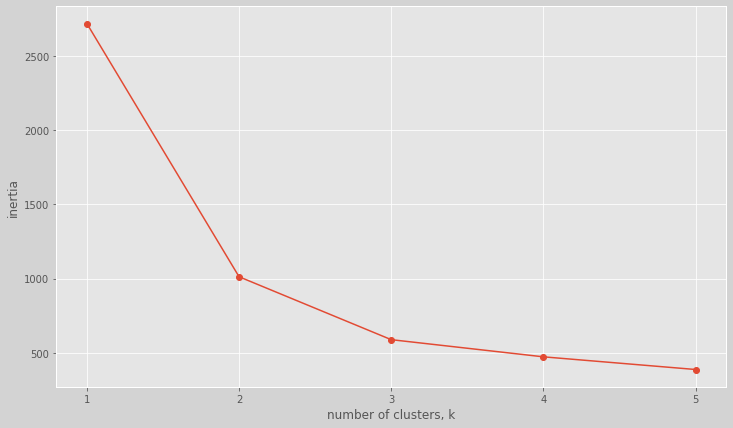

In [12]:
ks = range(1,6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(12, 7), facecolor='lightgrey')
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

### Evaluating the grain clustering
In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.


In [13]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          60          10
1                       0           1          60
2                      68           9           0


## Transforming features for better clusterings
- StandardScaler
    - In kmeans, feature variance = feature influence
    - ```StandardScaler``` transforms each feature to have mean 0 and variance 1
    - Features are said to be "standardized"
- StandardScaler, then KMeans
    - Need to perform two steps: ```StandardScaler```, then ```KMeans```
    - Use ```sklearn``` pipeline to combine multiple steps
    - Data flows from one step into the next

### Scaling fish data for clustering
You are given an array ```samples``` giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education](http://ww2.amstat.org/publications/jse/jse_data_archive.htm).

#### Preprocess

In [14]:
df = pd.read_csv('Grains/seeds.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [15]:
samples = df.iloc[:, 1:].values
species = df.iloc[:, 0].values

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

### Clustering the fish data
You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

In [17]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  10.59  10.74  10.79  10.80  10.82  ...  20.24  20.71  20.88  20.97  21.18
labels                                      ...                                   
0            0      0      0      0      0  ...      1      1      1      1      1
1            1      0      0      1      0  ...      0      0      0      0      0
2            0      0      0      0      0  ...      0      0      0      0      0
3            0      1      1      0      1  ...      0      0      0      0      0

[4 rows x 193 columns]


### Clustering stocks using KMeans
In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array ```movements``` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a ```Normalizer``` at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that ```Normalizer()``` is different to ```StandardScaler()```, which you used in the previous exercise. While ```StandardScaler()``` standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, ```Normalizer()``` rescales each sample - here, each company's stock price - independently of the other.

#### Preprocess

In [18]:
df = pd.read_csv('company-stock-movements-2010-2015-incl.csv', index_col=0)
df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-19,2010-01-20,2010-01-21,2010-01-22,2010-01-25,2010-01-26,2010-01-27,2010-01-28,2010-01-29,2010-02-01,2010-02-02,2010-02-03,2010-02-04,2010-02-05,2010-02-08,2010-02-09,2010-02-10,2010-02-11,2010-02-12,2010-02-16,2010-02-17,2010-02-18,2010-02-19,2010-02-22,2010-02-23,2010-02-24,2010-02-25,2010-02-26,2010-03-01,2010-03-02,...,2013-09-04,2013-09-05,2013-09-06,2013-09-09,2013-09-10,2013-09-11,2013-09-12,2013-09-13,2013-09-16,2013-09-17,2013-09-18,2013-09-19,2013-09-20,2013-09-23,2013-09-24,2013-09-25,2013-09-26,2013-09-27,2013-09-30,2013-10-01,2013-10-02,2013-10-03,2013-10-04,2013-10-07,2013-10-08,2013-10-09,2013-10-10,2013-10-11,2013-10-14,2013-10-15,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,-1.079998,...,-0.869980,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,-0.899999,...,0.680000,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,0.519997,...,5.310028,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,0.719997,0.050000,-0.830002,-2.770001,-1.309997,0.559997,0.709999,-1.239998,0.060002,0.369999,0.340000,-0.579998,-0.500000,0.189998,-0.969997,0.270001,0.169998,0.480000,0.629997,0.809998,-0.480000,0.080002,0.170002,-0.169998,-0.810002,0.310002,0.370003,0.039997,-0.070000,0.270000,...,0.620002,0.639999,-0.570000,0.070008,0.379997,0.480003,0.000000,-0.279999,-0.739998,1.320000,0.650001,-0.239998,-0.300003,-0.849999,-0.319999,-0.139999,0.320000,-0.169999,0.549996,0.290001,-0.549995,-0.090004,0.430001,-0.559998,-0.809998,-0.159996,1.470002,0.730004,0.739998,-0.379997,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000

In [19]:
movements = df.values
companies = df.index.values

In [20]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

### Which stocks move together?
In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

In [21]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
19       0                     GlaxoSmithKline
39       0                              Pfizer
37       0                            Novartis
1        1                                 AIG
3        1                    American express
5        1                     Bank of America
26       1                      JPMorgan Chase
55       1                         Wells Fargo
18       1                       Goldman Sachs
16       1                   General Electrics
15       1                                Ford
40       2                      Procter Gamble
41       2                       Philip Morris
28       2                           Coca Cola
27       2                      Kimberly-Clark
25       2                   Johnson & Johnson
38       2                               Pepsi
56       2                            Wal-Mart
9        2                   Colgate-Palmolive
36       3                    Northrop Grumman
4        3   